# **DSCI 100 Group Project Final: Predicting Usage of a Video Game Research Server**

- Group: project-009-26
- Members: Sua Kim, Jonathan Leung, Manny Vafaee, Jiaqi Zhuang

## **Introduction**

Datasets about video game use were collected from a Minecraft server set up by a CS group at UBC. The research group collected data on players' actions on the server, including gameplay, speech, and keystrokes. Using the dataset collected, we aim to identify the characteristics of players who are most likely to contribute significant amounts of data, thereby defining the target for our recruitment.  
Specifically, we formulated the question to address the goal of our project:  

#### **Can a player's age and experience level predict whether a player will become a high data contributor (measured by played_hours)?** 

To answer the question, we identify and fully describe the dataset `Players_csv` :

* 7 columns and 197 rows  
* Average value of hours played: 5.85  
* Average value of age: 21.14
 
* `experience`, “chr” type variable with five categories that represent the player’s experience level of Minecraft as `Pro`,`Veteran`,`Amateur`.`Regular`and`Beginner`
* `subscribe`, “lgl” type variable with binary responses `True`and`False`, represents whether a player has subscribed to the game-related newsletter.
* `hashedEmail`, “chr” type variable that represents player’s encrypted email
* `played_hours`, “dbl” type variable that represents hours played
* `name`, “chr” type variable that represents player’s name
* `gender`, “chr” type variable that represents player’s gender with seven categories including `Male`,`Female`,`Non-binary`.`Prefer not to say`,`Agender`,`Two-Spirited`and`Other`
* `Age`, “dbl” type variable that represents player’s age

## **Methods & Results**

### **Loading, Reading, Summary of Data**

In [59]:
library(tidyverse)
library(tidymodels)
library(readr)
library(dplyr)
library(ggplot2)

options(repr.matrix.max.rows = 8)
options(repr.plot.height = 6, repr.plot.width = 6)

In [60]:
# Loading the data
# Include brief explanation regarding why we chose to only use players.csv?
players <- read_csv("https://raw.githubusercontent.com/suakim550/DSCI100-Final-Group-Project/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [61]:
# Summary of loaded dataset
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [62]:
# Wrangled player dataset, converts experience as factor
players_wrangled_data <- players |> 
    select(experience, Age, played_hours) |>
    arrange(desc(played_hours))|> 
    mutate(experience = as_factor(experience))

players_wrangled_data

experience,Age,played_hours
<fct>,<dbl>,<dbl>
Regular,17,223.1
Regular,20,218.1
Regular,19,178.2
Amateur,16,150.0
⋮,⋮,⋮
Amateur,17,0
Amateur,20,0
Amateur,17,0
Amateur,57,0


### **Data Visualization**

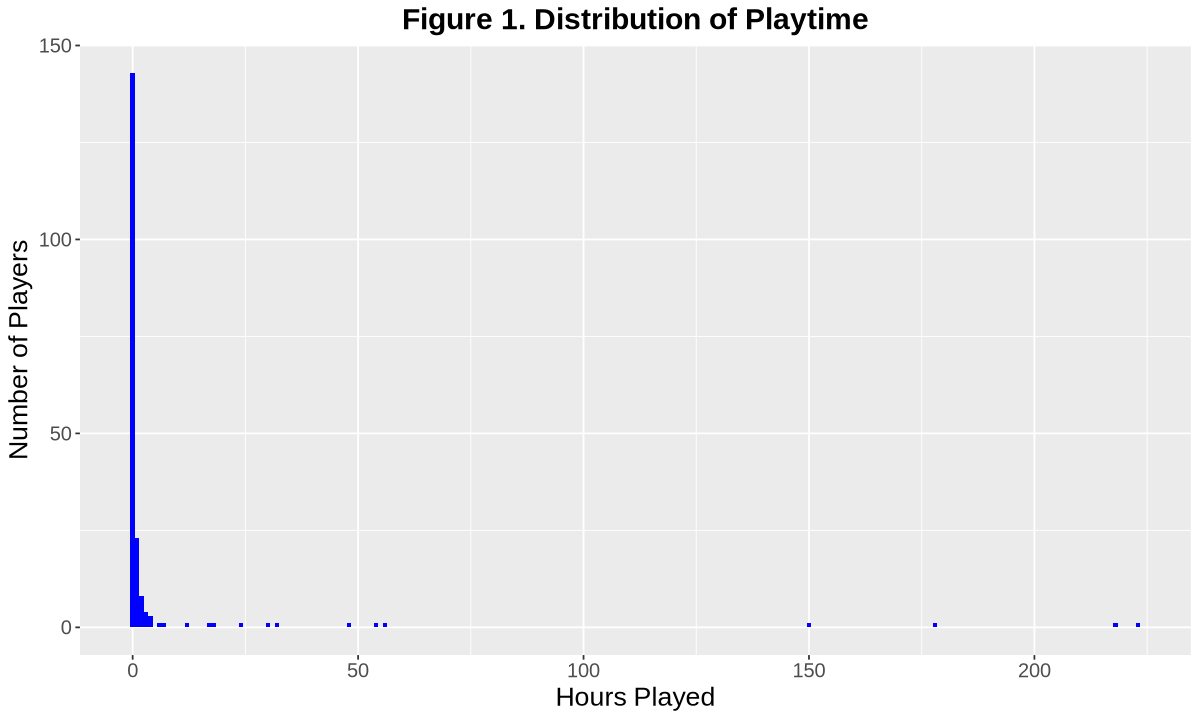

In [63]:
options(repr.plot.height = 6, repr.plot.width = 10)
fig_1 <- ggplot(players_wrangled_data, aes(x = played_hours)) +
    geom_histogram(binwidth = 1, fill = "blue") +
    labs(title = "Figure 1. Distribution of Playtime",
        x = "Hours Played",
        y = "Number of Players") +
    theme(plot.title = element_text(size = 18, face="bold", hjust = 0.5), axis.title = element_text(size = 16), axis.text = element_text(size = 12))

fig_1

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


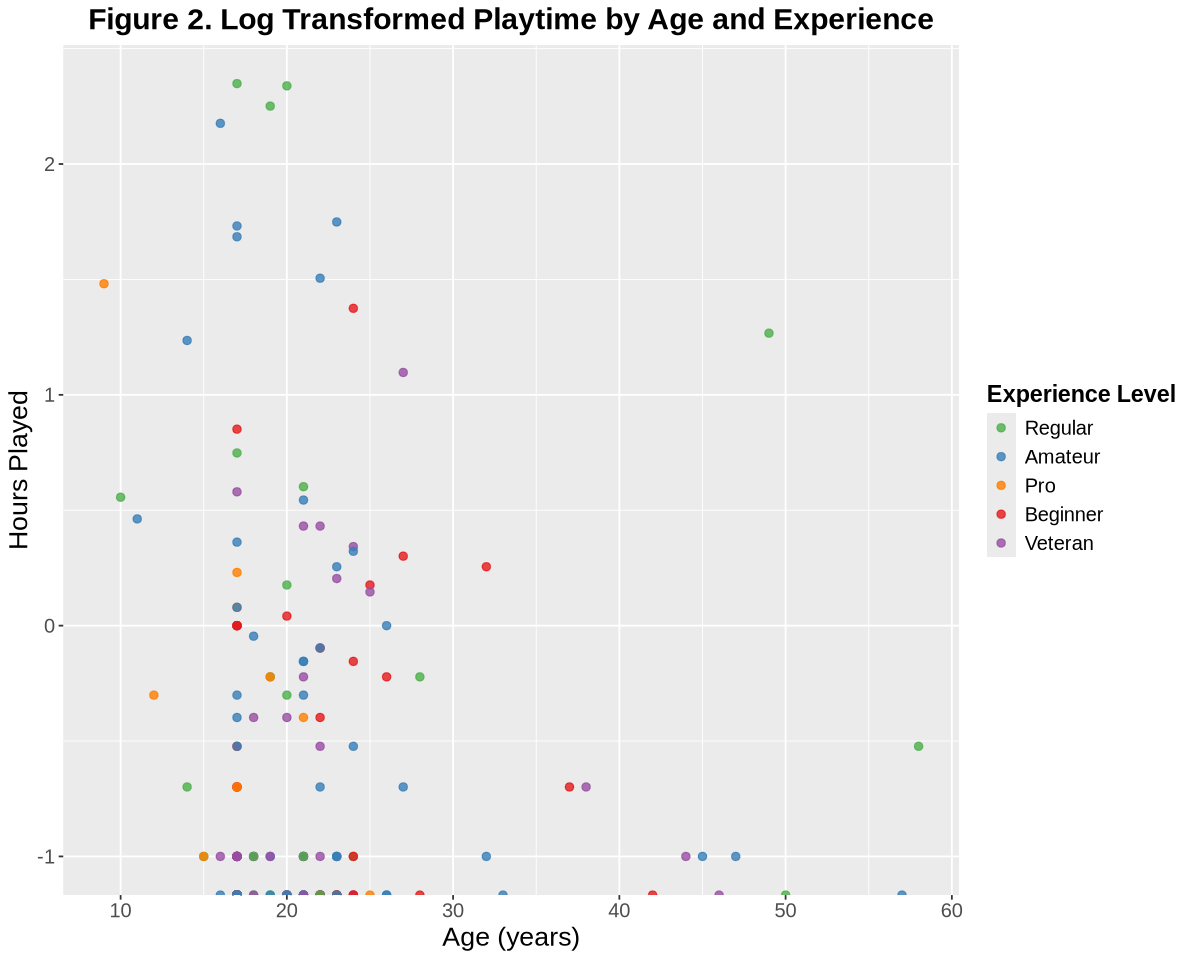

In [64]:
options(repr.plot.height = 8, repr.plot.width = 10)

player_hours_log <- players_wrangled_data |> 
    mutate(log_played_hours = log10(played_hours))

fig_2 <- ggplot(player_hours_log, aes(x = Age, y = log_played_hours, color = experience)) +
    geom_point(size = 2, alpha = 0.8) +
    labs(title = "Figure 2. Log Transformed Playtime by Age and Experience",
        x = "Age (years)",
        y = "Hours Played",
        color = "Experience Level") +
    scale_color_manual(
        values = c(
        "Beginner" = "#e41a1c",  
        "Amateur"  = "#377eb8", 
        "Regular"  = "#4daf4a",  
        "Pro"      = "#ff7f00",  
        "Veteran"  = "#984ea3"   
        )) +
    theme(plot.title = element_text(size = 18, face="bold", hjust = 0.5), 
          axis.title = element_text(size = 16), 
          axis.text = element_text(size = 12), 
          legend.title = element_text(size = 14, face = "bold"), 
          legend.text = element_text(size = 12))

fig_2

In [65]:
playtime_summary <- players_wrangled_data |>
    group_by(experience) |>
    summarise(
        mean_playtime = mean(played_hours, na.rm = TRUE),
        median_playtime = median(played_hours, na.rm = TRUE),
        sd_playtime = sd(played_hours, na.rm = TRUE),
        min_playtime = min(played_hours, na.rm = TRUE),
        max_playtime = max(played_hours, na.rm = TRUE),
        count = n()
    ) |>
    arrange(experience)

playtime_summary

experience,mean_playtime,median_playtime,sd_playtime,min_playtime,max_playtime,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Regular,18.2083333,0.1,57.957346,0,223.1,36
Amateur,6.0174603,0.1,21.987214,0,150.0,63
Pro,2.6000000,0.3,7.988838,0,30.3,14
Beginner,1.2485714,0.1,4.105547,0,23.7,35
Veteran,0.6479167,0.1,1.937424,0,12.5,48


##### **Table 1. Summary of Playtime by Experience Level**
| experience | mean_playtime | median_playtime | sd_playtime | min_playtime | max_playtime | count |
|------------|---------------|----------------|-------------|--------------|--------------|-------|
| Regular    | 18.21         | 0.10           | 57.96       | 0.00         | 223.10       | 36    |
| Amateur    | 6.02          | 0.10           | 21.99       | 0.00         | 150.00       | 63    |
| Pro        | 2.60          | 0.30           | 7.99        | 0.00         | 30.30        | 14    |
| Beginner   | 1.25          | 0.10           | 4.11        | 0.00         | 23.70        | 35    |
| Veteran    | 0.65          | 0.10           | 1.94        | 0.00         | 12.50        | 48    |

### **Data Analysis**

In [78]:
# Prepare the data; Define high contributor
players_wrangled_data_2 <- players_wrangled_data |> 
    mutate(high_contributor = if_else(played_hours >= quantile(played_hours, 0.75), "High", "Low")) |> 
    mutate(high_contributor = factor(high_contributor))

players_wrangled_data_2

experience,Age,played_hours,high_contributor
<fct>,<dbl>,<dbl>,<fct>
Regular,17,223.1,High
Regular,20,218.1,High
Regular,19,178.2,High
Amateur,16,150.0,High
⋮,⋮,⋮,⋮
Amateur,17,0,Low
Amateur,20,0,Low
Amateur,17,0,Low
Amateur,57,0,Low


In [79]:
# Split and train data
set.seed(123)

data_split <- initial_split(players_wrangled_data_2, prop = 0.7, strata = high_contributor)
train_data <- training(data_split)
test_data <- testing(data_split) |>
    drop_na()

players_recipe <- recipe(high_contributor ~ Age + experience, data = train_data) |>
    step_dummy(all_nominal_predictors()) |>
    step_novel(all_nominal_predictors()) |>
    step_zv(all_predictors()) |>
    step_normalize(all_numeric_predictors())

train_data <- players_wrangled_data_2 |>
    select(Age, experience, played_hours, high_contributor) |>
    drop_na()

In [90]:
# Tune for k
set.seed(123)

folds <- vfold_cv(train_data, v=5, strata = high_contributor)
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_tune <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = folds, grid = k_vals) 

accuracies <- knn_tune |> 
    collect_metrics() |>
    filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.3917341,5,0.03420445,Preprocessor1_Model01
2,accuracy,binary,0.3860796,5,0.02764699,Preprocessor1_Model02
3,accuracy,binary,0.4429015,5,0.03851332,Preprocessor1_Model03
4,accuracy,binary,0.4426518,5,0.03334597,Preprocessor1_Model04
⋮,⋮,⋮,⋮,⋮,⋮,⋮
7,accuracy,binary,0.5156478,5,0.06780131,Preprocessor1_Model07
8,accuracy,binary,0.5156478,5,0.06223994,Preprocessor1_Model08
9,accuracy,binary,0.6395951,5,0.06383749,Preprocessor1_Model09
10,accuracy,binary,0.6289339,5,0.06990666,Preprocessor1_Model10


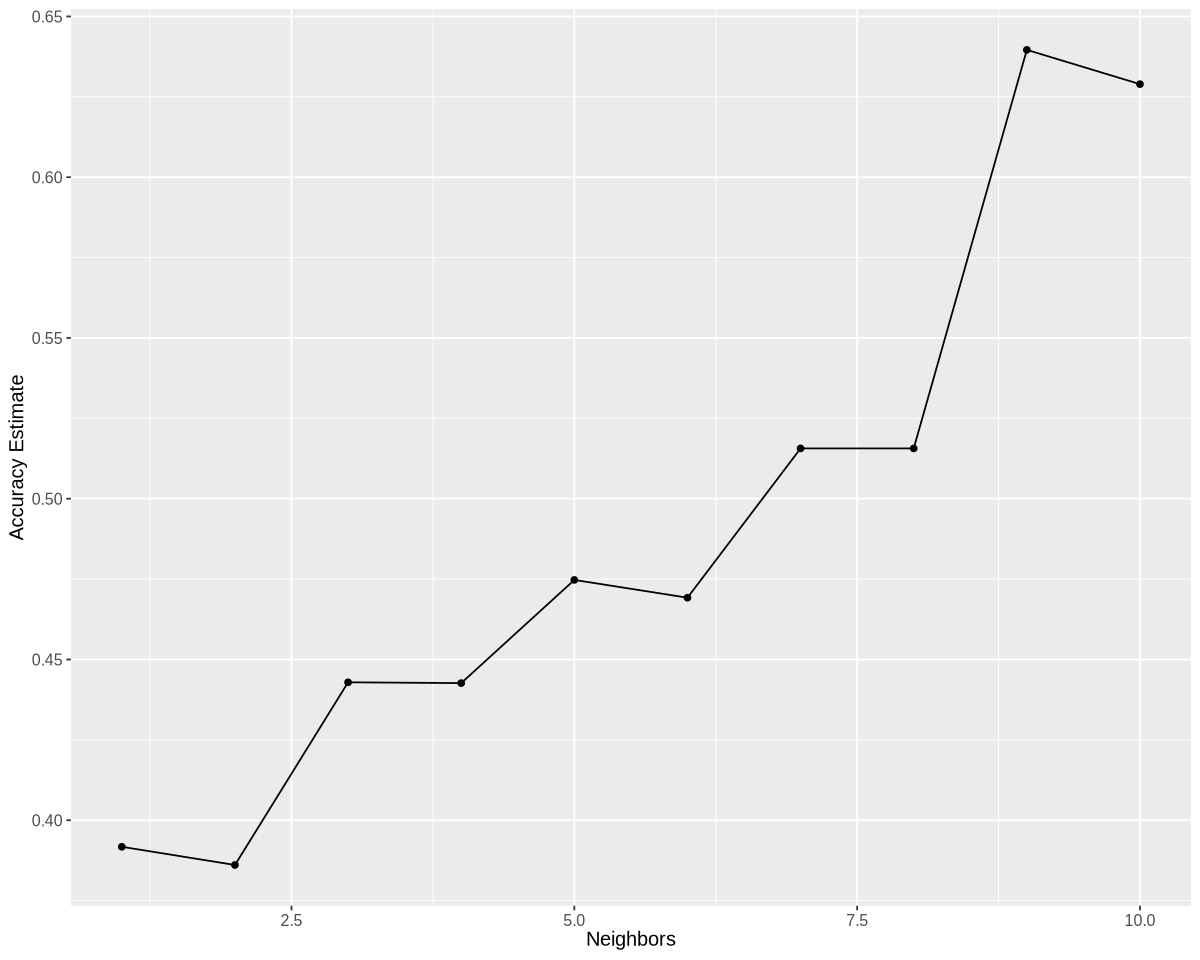

In [91]:
# Generate accuracy estimation plot to determine optimal k
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 12))

accuracy_vs_k

**Figure 3: Insert**

In [92]:
# Select optimal k from graph above
optimal_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)
optimal_k

[1] 9

In [93]:
# K-NN model
knn_spec_model <- nearest_neighbor(weight_func = "rectangular", 
                                   neighbors = optimal_k) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec_model) |>
    fit(data = train_data)

players_predictions <- predict(knn_results, test_data) |>
    bind_cols(test_data)

players_predictions

.pred_class,experience,Age,played_hours,high_contributor
<fct>,<fct>,<dbl>,<dbl>,<fct>
Low,Regular,17,223.1,High
Low,Regular,20,218.1,High
Low,Amateur,17,53.9,High
Low,Regular,21,4.0,High
⋮,⋮,⋮,⋮,⋮
Low,Veteran,17,0,Low
Low,Regular,22,0,Low
Low,Veteran,20,0,Low
Low,Beginner,17,0,Low


In [94]:
# Accuracy
players_predictions |>
    metrics(truth = high_contributor, estimate = .pred_class) |>
    filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7457627


In [95]:
# Precision
players_predictions |> pull(high_contributor) |> levels()

players_predictions |>
    precision(truth = high_contributor, estimate = .pred_class, event_level = "first")

[1] "High" "Low"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6666667


In [96]:
# Recall
players_predictions  |>
    recall(truth = high_contributor, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.125


#### **Table 2: Summary of Accuracy, Precision, and Recall**
| Metric | Value | 
|----------|----------|
| Accuracy  | 74.58%  |
| Precision | 66.67%  |
| Recall    | 12.5%  |

**Table 2: Insert**

In [97]:
# Confusion matrix
confusion <- players_predictions  |>
             conf_mat(truth = high_contributor, estimate = .pred_class)
confusion

          Truth
Prediction High Low
      High    2   1
      Low    14  42

#### **Table 3: Confusion Matrix**
| Prediction ↓ / Truth → | High | Low |
|--------------------|------|-----|
| High               | 2    | 1   |
| Low                | 14   | 42  |

**Table 3: Insert**

## **Discussion**

- summarize what you found
- discuss whether this is what you expected to fin
- discuss what impact could such findings have
- discuss what future questions could this lead to

## **References**

[1] Pacific Laboratory of Artificial Intelligence. (2024, March 19). Plaicraft. PLAICraft. https://plaicraft.ai/